# Intro

## Librerías

In [10]:
# Data
import pandas as pd
import numpy as np
import math
import os

# Visualizaciones
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Redes Neuronales
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Import/Export
import pickle
import joblib

In [2]:
REPO_NAME = "Multi-Parameter_Wireless_Network"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/MiguelMussi/{REPO_NAME}.git
  os.chdir(REPO_NAME)

Cloning into 'Multi-Parameter_Wireless_Network'...
remote: Enumerating objects: 264, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 264 (delta 76), reused 53 (delta 39), pack-reused 159
Receiving objects: 100% (264/264), 19.68 MiB | 8.52 MiB/s, done.
Resolving deltas: 100% (116/116), done.


## Representación Gráfica

### Pruebas

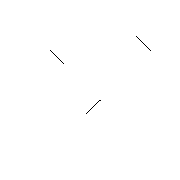

In [ ]:
def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth in antennas:
        # Origen del vector
        origin = (x, y)

        # Calcular el desplazamiento en x e y basado en el ángulo y la atenuación
        dx = math.cos(math.radians(azimuth))
        dy = math.sin(math.radians(azimuth))

        # Dibujar el vector desde la antena hasta el límite definido por la atenuación
        for i in range(attenuation):
            # Calcular las coordenadas del punto a lo largo del vector
            px = int(x + dx * i)
            py = int(y + dy * i)

            # Asegurarse de que las coordenadas estén dentro de la imagen
            if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                # Colorear el píxel en escala de grises
                gray_image[py, px] = 0  # Negro
                # Puedes ajustar el valor (0) para obtener diferentes tonos de gris

    return gray_image

# Definir las coordenadas de las antenas y sus direcciones de azimuth
antennas = [((50, 50), 45), ((100, 100), 135), ((150, 50), 225)]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 20  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


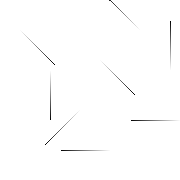

In [ ]:
def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth in antennas:
        # Origen del vector
        origin = (x, y)

        # Calcular el desplazamiento en x e y basado en el ángulo y la atenuación
        dx = math.cos(math.radians(azimuth))
        dy = math.sin(math.radians(azimuth))

        # Dibujar el vector desde la antena hasta el límite definido por la atenuación
        for i in range(attenuation):
            # Calcular las coordenadas del punto a lo largo del vector
            px = int(x + dx * i)
            py = int(y + dy * i)

            # Asegurarse de que las coordenadas estén dentro de la imagen
            if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                intensity = int(255 * (1 - i / attenuation))  # Atenuación gradual

                # Colorear el píxel en escala de grises
                gray_image[py, px] = intensity

    return gray_image

# Definir las coordenadas de las antenas y sus direcciones de azimuth

antennas = [
    ((20, 30), 45),   # Antena 1
    ((50, 70), 90),   # Antena 2
    ((80, 110), 135), # Antena 3
    ((110, 150), 180),# Antena 4
    ((140, 30), 225), # Antena 5
    ((170, 70), 270), # Antena 6
    ((200, 110), 315),# Antena 7
    ((230, 150), 0),  # Antena 8
    ((100, 60), 45),  # Antena 9
    ((180, 120), 180) # Antena 10
]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 50  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


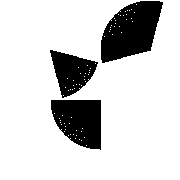

In [ ]:
def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth, amplitude in antennas:
        # Dibujar el sector circular para cada antena
        for angle in range(azimuth - amplitude, azimuth + amplitude + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = math.cos(math.radians(angle))
            dy = math.sin(math.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                    # Colorear el píxel en escala de grises
                    gray_image[py, px] = 0  # Negro
                    # Puedes ajustar el valor (0) para obtener diferentes tonos de gris

    return gray_image

# Definir las coordenadas de las antenas, sus direcciones de azimuth y amplitudes de ángulo
antennas = [
    ((50, 50), 45, 30),   # Antena 1
    ((100, 100), 135, 45),   # Antena 2
    ((150, 50), 225, 60)   # Antena 3
    # Puedes agregar más antenas según sea necesario
]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 50  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


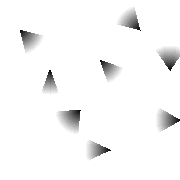

In [ ]:
def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth, amplitude in antennas:
        # Dibujar el sector circular para cada antena
        for angle in range(azimuth - amplitude, azimuth + amplitude + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = math.cos(math.radians(angle))
            dy = math.sin(math.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                    # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                    intensity = int(255 * (i / attenuation))  # Atenuación gradual inversa

                    # Colorear el píxel en escala de grises
                    gray_image[py, px] = intensity

    return gray_image

# Definir las coordenadas de las antenas, sus direcciones de azimuth y amplitudes de ángulo
antennas = [
    ((20, 30), 45, 30),   # Antena 1
    ((50, 70), 90, 20),   # Antena 2
    ((80, 110), 135, 40), # Antena 3
    ((110, 150), 180, 25),# Antena 4
    ((140, 30), 225, 30), # Antena 5
    ((170, 70), 270, 35), # Antena 6
    ((200, 110), 315, 20),# Antena 7
    ((230, 150), 0, 45),  # Antena 8
    ((100, 60), 45, 25),  # Antena 9
    ((180, 120), 180, 30) # Antena 10
]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 25  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


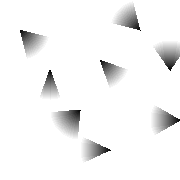

In [ ]:
def draw_antennas(image, antenna_data, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Parsear la información de las antenas
    antennas = parse_antennas(antenna_data)

    # Iterar sobre las antenas
    for (x, y), azimuth, amplitude in antennas:
        # Dibujar el sector circular para cada antena
        for angle in range(azimuth - amplitude, azimuth + amplitude + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = np.cos(np.radians(angle))
            dy = np.sin(np.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                    # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                    intensity = int(255 * (i / attenuation))  # Atenuación gradual inversa

                    # Colorear el píxel en escala de grises
                    gray_image[py, px] = intensity

    return gray_image

def parse_antennas(antenna_list):
    antennas = []
    for i in range(0, len(antenna_list), 4):
        x = antenna_list[i]
        y = antenna_list[i + 1]
        azimuth = antenna_list[i + 2]
        amplitude = antenna_list[i + 3]
        antennas.append(((x, y), azimuth, amplitude))
    return antennas

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Lista de antenas en formato cíclico (x, y, azimuth, amplitud)
antenna_data = [
    20, 30, 45, 30,
    50, 70, 90, 20,
    80, 110, 135, 40,
    110, 150, 180, 25,
    140, 30, 225, 30,
    170, 70, 270, 35,
    200, 110, 315, 20,
    230, 150, 0, 45,
    100, 60, 45, 25,
    180, 120, 180, 30
]

# Definir la atenuación
attenuation = 30  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antenna_data, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)



## Arrays

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_images(image_paths, target_size=(180, 180)):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=target_size)  # Cargar imagen y redimensionar
        img_array = img_to_array(img)  # Convertir imagen a array NumPy
        images.append(img_array)

    # Convertir lista de arrays a un array 4D
    input_data = np.array(images)
    return input_data

# Ejemplo de uso
image_paths = ["path_to_image1.png", "path_to_image2.png", ..., "path_to_image10.png"]
input_data = load_and_preprocess_images(image_paths)

print(input_data.shape)
# Salida esperada: (10, 180, 180, 4)


In [ ]:
# Crear un array 3x3x4 con valores específicos para cada canal
image_example = np.array([
    [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]],   # Primera fila
    [[12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23]], # Segunda fila
    [[24, 25, 26, 27], [28, 29, 30, 31], [32, 33, 34, 35]]  # Tercera fila
])

print(image_example.shape)
# Salida esperada: (3, 3, 4)

print(image_example)

(3, 3, 4)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]]]


In [ ]:
import numpy as np

# Crear valores para cada canal
c_channel = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

m_channel = np.array([
    [11, 12, 13],
    [14, 15, 16],
    [17, 18, 19]
])

y_channel = np.array([
    [21, 22, 23],
    [24, 25, 26],
    [27, 28, 29]
])

k_channel = np.array([
    [31, 32, 33],
    [34, 35, 36],
    [37, 38, 39]
])

# Combinar los canales en una sola imagen 3x3x4
image_example = np.stack((c_channel, m_channel, y_channel, k_channel), axis=-1)

print(image_example.shape)
print(image_example)

(3, 3, 4)
[[[ 1 11 21 31]
  [ 2 12 22 32]
  [ 3 13 23 33]]

 [[ 4 14 24 34]
  [ 5 15 25 35]
  [ 6 16 26 36]]

 [[ 7 17 27 37]
  [ 8 18 28 38]
  [ 9 19 29 39]]]


In [ ]:
# Definir dos imágenes de ejemplo
image1 = np.array([
    [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]],   # Primera fila
    [[12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23]],  # Segunda fila
    [[24, 25, 26, 27], [28, 29, 30, 31], [32, 33, 34, 35]]   # Tercera fila
])

image2 = np.array([
    [[100, 101, 102, 103], [104, 105, 106, 107], [108, 109, 110, 111]],  # Primera fila
    [[112, 113, 114, 115], [116, 117, 118, 119], [120, 121, 122, 123]],  # Segunda fila
    [[124, 125, 126, 127], [128, 129, 130, 131], [132, 133, 134, 135]]   # Tercera fila
])

# Crear el dataset combinando las dos imágenes
dataset = np.array([image1, image2])

print(dataset.shape)
# Salida esperada: (2, 3, 3, 4)

print(dataset)

(2, 3, 3, 4)
[[[[  0   1   2   3]
   [  4   5   6   7]
   [  8   9  10  11]]

  [[ 12  13  14  15]
   [ 16  17  18  19]
   [ 20  21  22  23]]

  [[ 24  25  26  27]
   [ 28  29  30  31]
   [ 32  33  34  35]]]


 [[[100 101 102 103]
   [104 105 106 107]
   [108 109 110 111]]

  [[112 113 114 115]
   [116 117 118 119]
   [120 121 122 123]]

  [[124 125 126 127]
   [128 129 130 131]
   [132 133 134 135]]]]


## Dataset

### EPT

In [ ]:
df_EPT = pd.read_csv("attachment_info/EPT.csv", delim_whitespace=True)

In [ ]:
df_EPT

,SiteName,SiteID,CellName,CellID,X,Y,Z,Azimuth,Downtilt,Antenna
0,site1,1,cell1,1,138.07,1101.27,11,100,3,0
1,site1,1,cell2,2,138.07,1101.27,11,270,3,0
2,site1,1,cell3,3,138.07,1101.27,11,0,3,0
3,site2,2,cell4,4,419.50,1186.36,25,335,5,0
4,site2,2,cell5,5,419.50,1186.36,25,125,8,0
5,site2,2,cell6,6,419.50,1186.36,25,175,5,0
6,site3,3,cell7,7,1583.26,686.97,19,170,3,0
7,site3,3,cell8,8,1583.26,686.97,19,0,3,0
8,site3,3,cell9,9,1583.26,686.97,19,270,3,0
9,site4,4,cell10,10,602.50,599.26,30,60,3,0


In [ ]:
df_EPT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SiteName  56 non-null     object 
 1   SiteID    56 non-null     int64  
 2   CellName  56 non-null     object 
 3   CellID    56 non-null     int64  
 4   X         56 non-null     float64
 5   Y         56 non-null     float64
 6   Z         56 non-null     int64  
 7   Azimuth   56 non-null     int64  
 8   Downtilt  56 non-null     int64  
 9   Antenna   56 non-null     int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 4.5+ KB


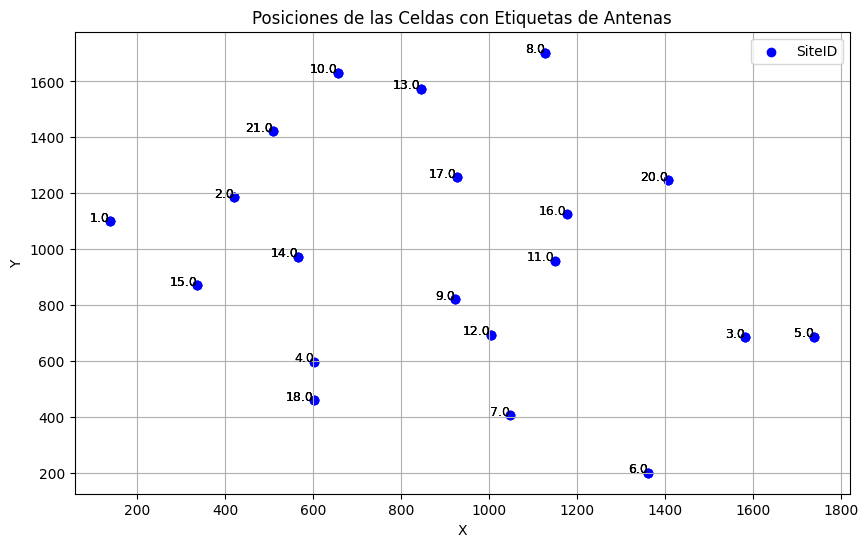

In [ ]:
# Seleccionar las columnas necesarias
df_filtered = df_EPT[['SiteID', 'CellID', 'X', 'Y']]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['X'], df_filtered['Y'], c='blue', label='SiteID')

# Añadir etiquetas a cada punto
for i, row in df_filtered.iterrows():
    plt.text(row['X'], row['Y'], row['SiteID'], fontsize=9, ha='right')

# Configuración del gráfico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Posiciones de las Celdas con Etiquetas de Antenas')
plt.legend()
plt.grid(True)
plt.show()

### Inputs

In [ ]:
# x y z azimuth tilt azimuth_ancho tilt_ancho

In [25]:
# Leer el archivo de texto
with open('datos_xyz.txt', 'r') as file:
    data = file.read()

# Dividir los datos por líneas y luego por espacios
lines = data.strip().split('\n')
rows = [line.split() for line in lines]

# Convertir la lista de listas en un DataFrame
df_xyz = pd.DataFrame(rows)

# Convertir los datos a tipos numéricos
df_xyz = df_xyz.apply(pd.to_numeric)

In [26]:
df_xyz

,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
0,138.07,1101.27,11,100,5,15,25,138.07,1101.27,11,...,508.96,1421.58,35,80,3,90,12,12.42,8.52,21.36
1,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,30,7,45,12,18.92,6.64,21.18
2,138.07,1101.27,11,110,-3,45,12,138.07,1101.27,11,...,508.96,1421.58,35,30,13,110,6,12.63,6.59,17.89
3,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,70,15,110,25,11.07,9.36,22.05
4,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,70,5,15,25,13.17,6.56,17.95
17396,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,60,13,25,25,14.46,9.37,20.56
17397,138.07,1101.27,11,70,7,65,25,138.07,1101.27,11,...,508.96,1421.58,35,70,15,110,25,11.45,11.85,22.78
17398,138.07,1101.27,11,90,13,25,6,138.07,1101.27,11,...,508.96,1421.58,35,30,7,15,12,13.34,8.40,20.63


Renombrar Columnas

In [ ]:
def renombrar_columnas(df):
    new_col_names = []
    suffixes = ['x', 'y', 'z', 'A', 'T', 'a', 't']

    # Calcular el número de ciclos necesarios
    num_cycles = len(df.columns) - 3  # Excluyendo las 3 últimas columnas con nombres específicos
    num_cycles = num_cycles // len(suffixes)

    # Iterar sobre el rango de 1 hasta el número de ciclos + 1
    for i in range(1, num_cycles + 1):
        new_col_names.extend([f'{i}{suffix}' for suffix in suffixes])

    # Añadir los nombres de las últimas tres columnas
    new_col_names.extend(['R1', 'R2', 'R3'])

    df.columns = new_col_names
    return df

In [ ]:
df_xyz = renombrar_columnas(df_xyz)

In [ ]:
df_xyz

,1x,1y,1z,1A,1T,1a,1t,2x,2y,2z,...,56x,56y,56z,56A,56T,56a,56t,R1,R2,R3
0,138.07,1101.27,11,100,5,15,25,138.07,1101.27,11,...,508.96,1421.58,35,80,3,90,12,12.42,8.52,21.36
1,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,30,7,45,12,18.92,6.64,21.18
2,138.07,1101.27,11,110,-3,45,12,138.07,1101.27,11,...,508.96,1421.58,35,30,13,110,6,12.63,6.59,17.89
3,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,70,15,110,25,11.07,9.36,22.05
4,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,70,5,15,25,13.17,6.56,17.95
17396,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,60,13,25,25,14.46,9.37,20.56
17397,138.07,1101.27,11,70,7,65,25,138.07,1101.27,11,...,508.96,1421.58,35,70,15,110,25,11.45,11.85,22.78
17398,138.07,1101.27,11,90,13,25,6,138.07,1101.27,11,...,508.96,1421.58,35,30,7,15,12,13.34,8.40,20.63


In [ ]:
df_xyz.describe().round(1)

,1x,1y,1z,1A,1T,1a,1t,2x,2y,2z,...,56x,56y,56z,56A,56T,56a,56t,R1,R2,R3
count,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,...,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0
mean,138.1,1101.3,11.0,87.5,6.0,55.1,15.0,138.1,1101.3,11.0,...,509.0,1421.6,35.0,58.5,7.7,64.4,13.3,12.9,6.4,17.7
std,0.0,0.0,0.0,22.6,6.6,36.7,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,23.8,5.9,40.1,7.2,9.4,3.3,6.8
min,138.1,1101.3,11.0,70.0,-7.0,15.0,6.0,138.1,1101.3,11.0,...,509.0,1421.6,35.0,30.0,-3.0,15.0,6.0,0.1,1.5,5.2
25%,138.1,1101.3,11.0,70.0,1.0,25.0,6.0,138.1,1101.3,11.0,...,509.0,1421.6,35.0,30.0,5.0,25.0,6.0,5.9,3.9,11.6
50%,138.1,1101.3,11.0,70.0,7.0,25.0,12.0,138.1,1101.3,11.0,...,509.0,1421.6,35.0,60.0,7.0,65.0,12.0,10.9,5.8,17.6
75%,138.1,1101.3,11.0,100.0,11.0,105.0,25.0,138.1,1101.3,11.0,...,509.0,1421.6,35.0,80.0,13.0,110.0,12.0,16.6,7.8,21.9
max,138.1,1101.3,11.0,130.0,13.0,110.0,25.0,138.1,1101.3,11.0,...,509.0,1421.6,35.0,90.0,15.0,110.0,25.0,44.1,22.7,41.1


DataFrames aislados por característica

In [ ]:
# Generar los subsets
df_x = df_xyz[[col for col in df_xyz.columns if col.endswith('x')]]
df_y = df_xyz[[col for col in df_xyz.columns if col.endswith('y')]]
df_z = df_xyz[[col for col in df_xyz.columns if col.endswith('z')]]
df_A = df_xyz[[col for col in df_xyz.columns if col.endswith('A')]]
df_T = df_xyz[[col for col in df_xyz.columns if col.endswith('T')]]
df_a = df_xyz[[col for col in df_xyz.columns if col.endswith('a')]]
df_t = df_xyz[[col for col in df_xyz.columns if col.endswith('t')]]
df_R = df_xyz[['R1', 'R2', 'R3']]

In [ ]:
df_R

,R1,R2,R3
0,12.42,8.52,21.36
1,18.92,6.64,21.18
2,12.63,6.59,17.89
3,11.07,9.36,22.05
4,15.78,7.42,20.80
...,...,...,...
17395,13.17,6.56,17.95
17396,14.46,9.37,20.56
17397,11.45,11.85,22.78
17398,13.34,8.40,20.63


Valores extremos de cada columna

In [ ]:
df_t.min().min(), df_t.max().max()

(6, 25)

In [ ]:
subset_names = ['df_x', 'df_y', 'df_z', 'df_A', 'df_T', 'df_a', 'df_t']
for subset_name in subset_names:
    print(f"Valores extremos de {subset_name}: {eval(subset_name).min().min()}, {eval(subset_name).max().max()}")

for i in range(3):
    print(f"Valores extremos de R{i+1}: {df_R[f'R{i+1}'].min(), df_R[f'R{i+1}'].max()}")

Valores extremos de df_x: 138.07, 1740.06
Valores extremos de df_y: 202.01, 1702.46
Valores extremos de df_z: 10, 45
Valores extremos de df_A: 0, 355
Valores extremos de df_T: -8, 30
Valores extremos de df_a: 15, 110
Valores extremos de df_t: 6, 25
Valores extremos de R1: (0.13, 44.08)
Valores extremos de R2: (1.53, 22.72)
Valores extremos de R3: (5.15, 41.1)


In [ ]:
# Filtrar los registros con valores de columnas terminadas en 'z' igual a 45
df_condic = df_xyz[df_xyz[[col for col in df_xyz.columns if col.endswith('z')]].eq(45).any(axis=1)]

In [ ]:
df_condic

,1x,1y,1z,1A,1T,1a,1t,2x,2y,2z,...,56x,56y,56z,56A,56T,56a,56t,R1,R2,R3
0,138.07,1101.27,11,100,5,15,25,138.07,1101.27,11,...,508.96,1421.58,35,80,3,90,12,12.42,8.52,21.36
1,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,30,7,45,12,18.92,6.64,21.18
2,138.07,1101.27,11,110,-3,45,12,138.07,1101.27,11,...,508.96,1421.58,35,30,13,110,6,12.63,6.59,17.89
3,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,70,15,110,25,11.07,9.36,22.05
4,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,70,5,15,25,13.17,6.56,17.95
17396,138.07,1101.27,11,100,3,105,6,138.07,1101.27,11,...,508.96,1421.58,35,60,13,25,25,14.46,9.37,20.56
17397,138.07,1101.27,11,70,7,65,25,138.07,1101.27,11,...,508.96,1421.58,35,70,15,110,25,11.45,11.85,22.78
17398,138.07,1101.27,11,90,13,25,6,138.07,1101.27,11,...,508.96,1421.58,35,30,7,15,12,13.34,8.40,20.63


## Generación de imágenes

In [30]:
def leer_datos_xyz(url):
    # Leer el archivo de texto
    with open(url, 'r') as file:
        data = file.read()

    # Dividir los datos por líneas y luego por espacios
    lines = data.strip().split('\n')
    rows = [line.split() for line in lines]

    # Convertir la lista de listas en un DataFrame
    df_xyz = pd.DataFrame(rows)

    # Convertir los datos a tipos numéricos
    df_xyz = df_xyz.apply(pd.to_numeric)

    return df_xyz


def escalar_xy(df):
    columns_to_scale = [i for i in range(len(df.columns)) if i % 7 == 0 or (i - 1) % 7 == 0]
    df.iloc[:, columns_to_scale] = df.iloc[:, columns_to_scale] / 10
    return df

def parse_antenas(antena_list):
    antennas = []
    for i in range(0, len(antena_list), 7):
        # Verificar que hay suficientes elementos restantes para formar una antena completa
        if i + 6 < len(antena_list):
            x = antena_list[i]
            y = antena_list[i + 1]
            z = antena_list[i + 2]
            A = int(antena_list[i + 3])
            T = int(antena_list[i + 4])
            a = int(antena_list[i + 5])
            t = int(antena_list[i + 6])
            antennas.append(((x, y, z), A, a, T, t))
    return antennas


def draw_antenas(image_shape, antena_data, attenuation):
    # Crear una imagen en blanco y negro
    image = np.zeros(image_shape, dtype=np.uint8)

    # Parsear la información de las antenas
    antenas = parse_antenas(antena_data)

    # Iterar sobre las antenas
    for (x, y, z), A, a, T, t in antenas:
        # Dibujar el sector circular para cada antena
        for angle in range(A - a, A + a + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = math.cos(math.radians(angle))
            dy = math.sin(math.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image_shape[1] and 0 <= py < image_shape[0]:
                    # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                    intensity = 255 - int(255 * i / attenuation)  # Atenuación gradual inversa

                    # Colorear el píxel en escala de grises
                    image[py, px] = max(image[py, px], intensity)  # Tomar el máximo valor si ya está coloreado

    return image

def parse_registros(df):
    registros = []
    for index, row in df.iterrows():
        antena_list = row[:-3].tolist()  # Excluir las últimas 3 columnas (R1, R2, R3)
        registros.append(antena_list)
    return registros

In [31]:
url = 'datos_xyz.txt'
attenuation = 30
image_shape = (180, 180)

df = leer_datos_xyz(url)
df = df_xyz.head(2)
df = escalar_xy(df)
registros = parse_registros(df)

images = []
for registro in registros:
    image = draw_antenas(image_shape, registro, attenuation)
    images.append(image)

# Mostrar la primera imagen resultante (requiere que se ejecute en un entorno que soporte la visualización de imágenes)
for i, img in enumerate(images):
    cv2.imshow(f"Result Image {i}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

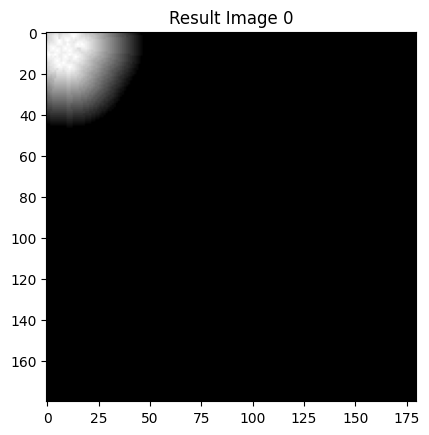

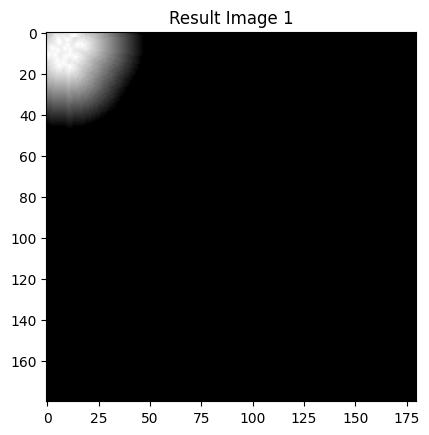

In [34]:
# Mostrar imágenes con matplotlib
for i, img in enumerate(images):
    plt.figure()
    plt.title(f"Result Image {i}")
    plt.imshow(img, cmap='gray')
    plt.show()

### Prueba de función draw_images

In [ ]:
attenuation = 30
image_shape = (180, 180)

antena_data = [
    150, 100, 270, 75, 5, 35, 25,
    88.07, 101.27, 11, 220, 5, 20, 25,
    50.96, 141.58, 35, 180, 3, 30, 12,
    160, 90, 30, 30, 5, 35, 25,
    103, 24, 11, 300, 5, 20, 25,
    160, 30, 35, 120, 3, 60, 12,
    150, 120, 270, 180, 5, 15, 25,
    40, 90, 11, 105, 5, 20, 25,
    5, 30, 35, 315, 3, 15, 12,
]

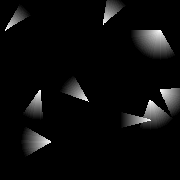

In [ ]:
# Dibujar las antenas en la imagen
result_image = draw_antenas(image_shape, antena_data, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
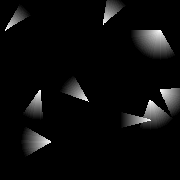

In [ ]:
result_image

# CNN

In [ ]:
# Crear dos imágenes de ejemplo con valores aleatorios
image1 = np.random.randint(0, 256, size=(180, 180, 4), dtype=np.uint8)
image2 = np.random.randint(0, 256, size=(180, 180, 4), dtype=np.uint8)

# Crear el dataset combinando las dos imágenes
dataset = np.array([image1, image2])

print(dataset.shape)
# Salida esperada: (2, 180, 180, 4)

# Mostrar una parte del contenido del dataset para verificar la estructura
print(dataset[0, :2, :2, :])  # Mostrar una pequeña porción de la primera imagen


(2, 180, 180, 4)
[[[151 100 254  49]
  [240 145  20   3]]

 [[ 65  78 185 107]
  [159 119 111  16]]]


In [ ]:
# Crear etiquetas dummy (por ejemplo, R1, R2, R3 para cada imagen)
labels = np.array([
    [50, 20, 10],  # Etiquetas para la primera imagen
    [40, 15, 7]   # Etiquetas para la segunda imagen
])

In [ ]:
def build_model(image_height=180, image_width=180, num_channels=4):
    input_shape = (image_height, image_width, num_channels)
    inputs = Input(shape=input_shape)

    # Primera capa convolucional
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Segunda capa convolucional
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Tercera capa convolucional
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Cuarta capa convolucional
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Capa completamente conectada
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Capa de salida con 3 unidades (R1, R2, R3)
    outputs = Dense(3, activation='linear')(x)

    model = Model(inputs, outputs)

    return model

In [ ]:
# Ejemplo de cómo construir el modelo con diferentes parámetros
model = build_model(image_height=180, image_width=180, num_channels=4)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 4)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      1184      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 90, 90, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 64)        0   

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Entrenar el modelo
model.fit(dataset, labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 864.5172
Epoch 2/10
1/1 [==============================] - 1s 570ms/step - loss: 1108.9570
Epoch 3/10
1/1 [==============================] - 1s 507ms/step - loss: 522.7142
Epoch 4/10
1/1 [==============================] - 1s 512ms/step - loss: 1077.1577
Epoch 5/10
1/1 [==============================] - 0s 486ms/step - loss: 1219.7446
Epoch 6/10
1/1 [==============================] - 1s 514ms/step - loss: 573.1901
Epoch 7/10
1/1 [==============================] - 1s 502ms/step - loss: 512.9535
Epoch 8/10
1/1 [==============================] - 1s 512ms/step - loss: 1675.8489
Epoch 9/10
1/1 [==============================] - 1s 519ms/step - loss: 1240.0569
Epoch 10/10
1/1 [==============================] - 1s 524ms/step - loss: 1517.7410


In [ ]:
# Crear tres imágenes de prueba con valores aleatorios
test_image1 = np.random.randint(0, 256, size=(180, 180, 4), dtype=np.uint8)
test_image2 = np.random.randint(0, 256, size=(180, 180, 4), dtype=np.uint8)
test_image3 = np.random.randint(0, 256, size=(180, 180, 4), dtype=np.uint8)

# Crear el dataset de prueba combinando las tres imágenes
test_dataset = np.array([test_image1, test_image2, test_image3])

print(test_dataset.shape)
# Salida esperada: (3, 180, 180, 4)

# Mostrar una parte del contenido del dataset de prueba para verificar la estructura
print(test_dataset[0, :2, :2, :])  # Mostrar una pequeña porción de la primera imagen de prueba

(3, 180, 180, 4)
[[[ 19 241 161 236]
  [227 225 181  62]]

 [[133 147 180  87]
  [206 254 139  83]]]


In [ ]:
# Realizar predicciones con el dataset de prueba
predictions = model.predict(test_dataset)

# Mostrar las predicciones
print(predictions)

1/1 [==============================] - 0s 410ms/step
[[-160.45331   -27.11175   -14.85105 ]
 [-158.05544   -28.564264  -13.943055]
 [-158.1717    -27.177637  -14.160987]]
